This Jupyter notebook provides an example on how to analyze Netlogo data with Python. It is based on Chris Davis' analysis of Netlogo data in R that can be found [here](https://cbdavis.github.io/Demo-Analyzing-Netlogo-Data-with-R/NetLogoDataDemo.html). In particular, we use the same data file.

In [1]:
#Load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

In [2]:
# We start by reading in the file generated by Netlogo's behaviorspace.
Basecase = pd.read_csv('Basecase warmup.csv', skiprows=6)
Basecasenormal = pd.read_csv('Basecase warmup.csv', skiprows=6)
Basecasetest = pd.read_csv('Basecase warmup.csv', skiprows=6)
#ReboundA = pd.read_csv('ReboundA1.csv', skiprows=6)

In [3]:
# Rename two column names
Basecase.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
Basecasenormal.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
Basecasenormal['year']=Basecasenormal['tick'].div(365)

Basecasetest.rename(columns={'[run number]':'run_number','[step]':'tick'}, inplace=True)
Basecasetest.drop(Basecasetest[Basecasetest['tick'] > 1095].index, inplace = True)
Basecasetest[0:100]

,run_number,Value-of-price-modification,Social-influence-radius,Random-seed?,Segment-influence,Rebound?,Seed,Social-influence-threshold,Price-influence,Increase-only-for-high-values?,...,Possession-wears-average,tick,service-lifespan,new-consumption,wears,owners,reused-textiles-percentage,textiles-in-closet,reused-textiles-average,new-textiles-average
0,8,0,13,False,5,True,50,5,5,False,...,77,0,2.871029,0.0,43.099719,1.045307,4.530744,123.6,5.6,118.0
1,4,0,13,False,5,True,50,5,5,False,...,77,0,2.825434,0.0,42.813046,1.065041,6.504065,123.0,8.0,115.0
2,6,0,13,False,5,True,50,5,5,False,...,77,0,2.808711,0.0,40.565248,1.050081,5.008078,123.8,6.2,117.6
3,2,0,13,False,5,True,50,5,5,False,...,77,0,2.884792,0.0,42.589204,1.063415,6.341463,123.0,7.8,115.2
4,7,0,13,False,5,True,50,5,5,False,...,77,0,3.056833,0.0,44.483570,1.069243,6.924316,124.2,8.6,115.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,0,13,False,5,True,50,5,5,False,...,77,12,3.022528,0.0,42.895514,1.078560,7.855974,122.4,9.6,112.6
96,4,0,13,False,5,True,50,5,5,False,...,77,15,2.854575,0.0,43.290575,1.065657,6.565657,119.8,7.8,111.0
97,6,0,13,False,5,True,50,5,5,False,...,77,14,2.847513,0.0,40.822567,1.051071,5.107084,122.2,6.2,115.2
98,1,0,13,False,5,True,50,5,5,False,...,77,13,2.930214,0.0,44.075241,1.054455,5.445545,121.2,6.6,114.6


In [4]:
Basecase.drop(Basecase[Basecase['tick'] < 5475].index, inplace = True)


Basecase['year1']=Basecase['tick'].div(365)
Basecase['year']=Basecase['year1']-15
Basecase[0:100]

Basecasetest['year']=Basecasetest['tick'].div(365)

In [5]:
Basecase['service-lifespan-1']=2*Basecase['service-lifespan']
Basecasenormal['service-lifespan-1']=2*Basecasenormal['service-lifespan']

Basecase['wears-1']=2*Basecase['wears']
Basecasenormal['wears-1']=2*Basecasenormal['wears']

In [6]:
Basecasetest['year'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
1714396    2.989041
1714400    2.991781
1714404    2.994521
1714409    2.997260
1714412    3.000000
Name: year, Length: 54800, dtype: float64>

In [7]:
Basecase['service-lifespan'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 40636      3.412388
40642      3.415127
40651      3.420506
40659      3.423246
40667      3.421534
             ...   
1829995    3.490598
1829996    3.493337
1829997    3.490212
1829998    3.488990
1829999    3.491730
Name: service-lifespan, Length: 1556250, dtype: float64>

In [8]:
Basecase['wears'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 40636      23.225871
40642      23.243878
40651      23.263370
40659      23.281356
40667      23.270169
             ...    
1829995    22.155341
1829996    22.172386
1829997    22.137386
1829998    22.129285
1829999    22.146198
Name: wears, Length: 1556250, dtype: float64>

In [9]:
Basecasenormal['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            0.000000
1            0.000000
2            0.000000
3            0.000000
4            0.000000
              ...    
1829995    100.260274
1829996    100.263014
1829997    100.265753
1829998    100.268493
1829999    100.271233
Name: year, Length: 1830000, dtype: float64>

In [10]:
check = np.linspace(start = 0, stop = 100, num = 100).astype(int)
#dataframe_short = myDataframe[myDataframe['year'].isin(check)]
Basecase_short = Basecase[Basecase['year'].isin(check)]
Basecasenormal_short = Basecasenormal[Basecasenormal['year'].isin(check)]

Basecasetest_short = Basecase[Basecase['tick'].isin(check)]

# Short database

In [11]:
Basecase_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 40636       0.0
42874       0.0
43371       1.0
43656       0.0
43869       0.0
           ... 
1828487    82.0
1828918    85.0
1829170    83.0
1829535    84.0
1829900    85.0
Name: year, Length: 4300, dtype: float64>

In [12]:
Basecasenormal_short['year'].max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0            0.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
1827737     96.0
1828487     97.0
1828918    100.0
1829170     98.0
1829900    100.0
Name: year, Length: 5000, dtype: float64>

KeyboardInterrupt: 

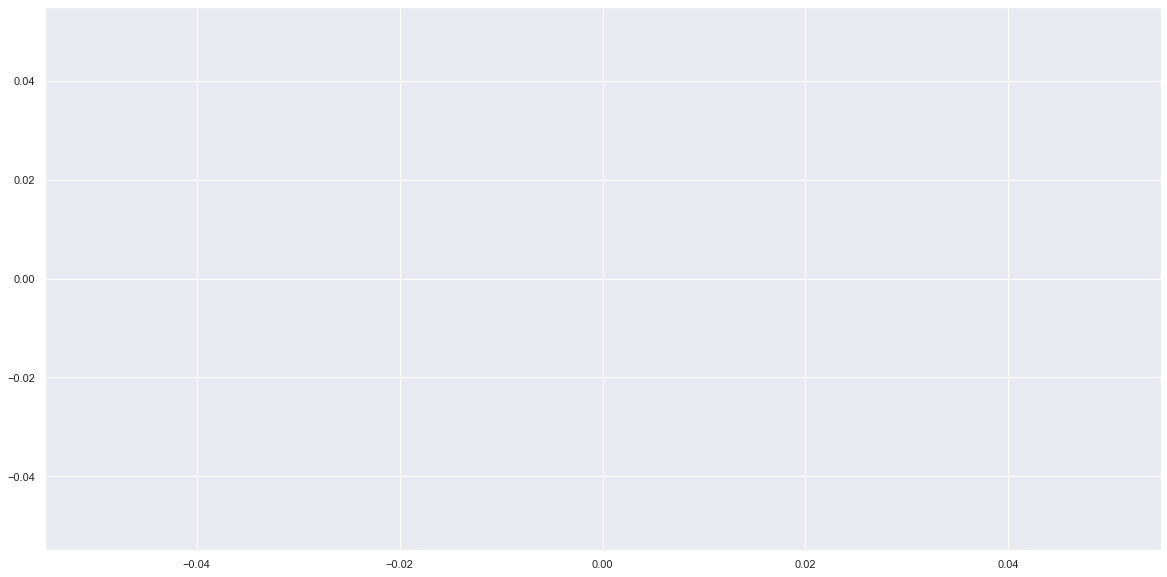

In [23]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasetest, x='year', y = 'reused-textiles-percentage', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 3)
plt.ylim(6,10)
plt.title("Percentage reused textiles Basecase", fontsize = 24)

Text(0.5, 1.0, 'Percentage reused textiles Basecase')

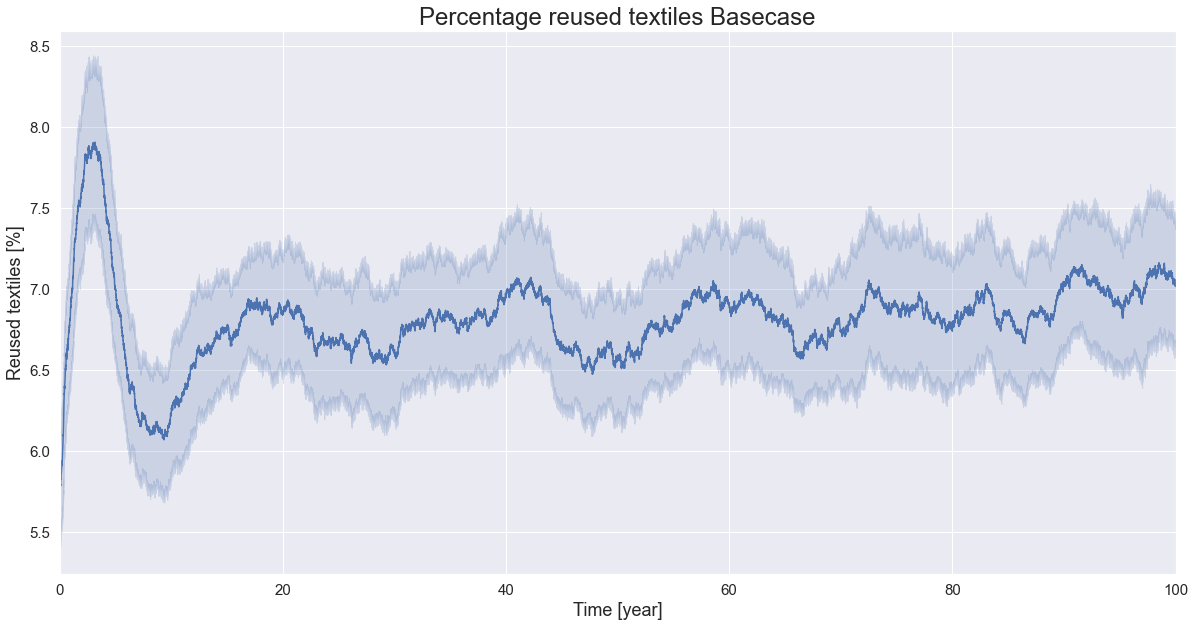

In [41]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'reused-textiles-percentage', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Reused textiles [%]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("Percentage reused textiles Basecase", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption Basecase')

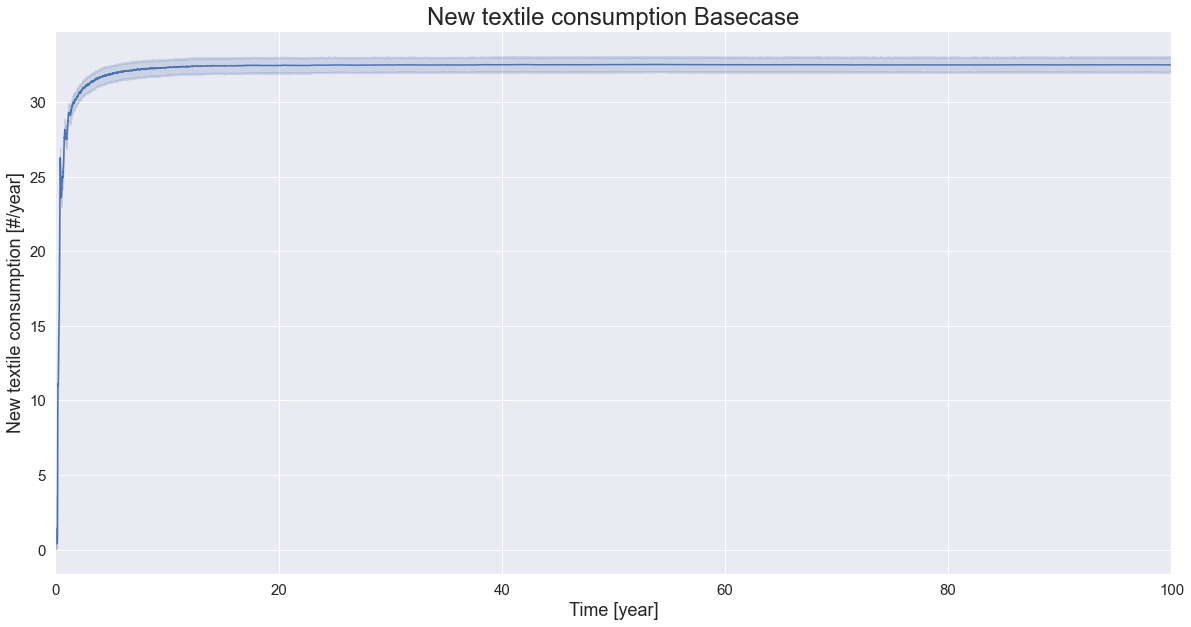

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("New textile consumption Basecase", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption Basecase')

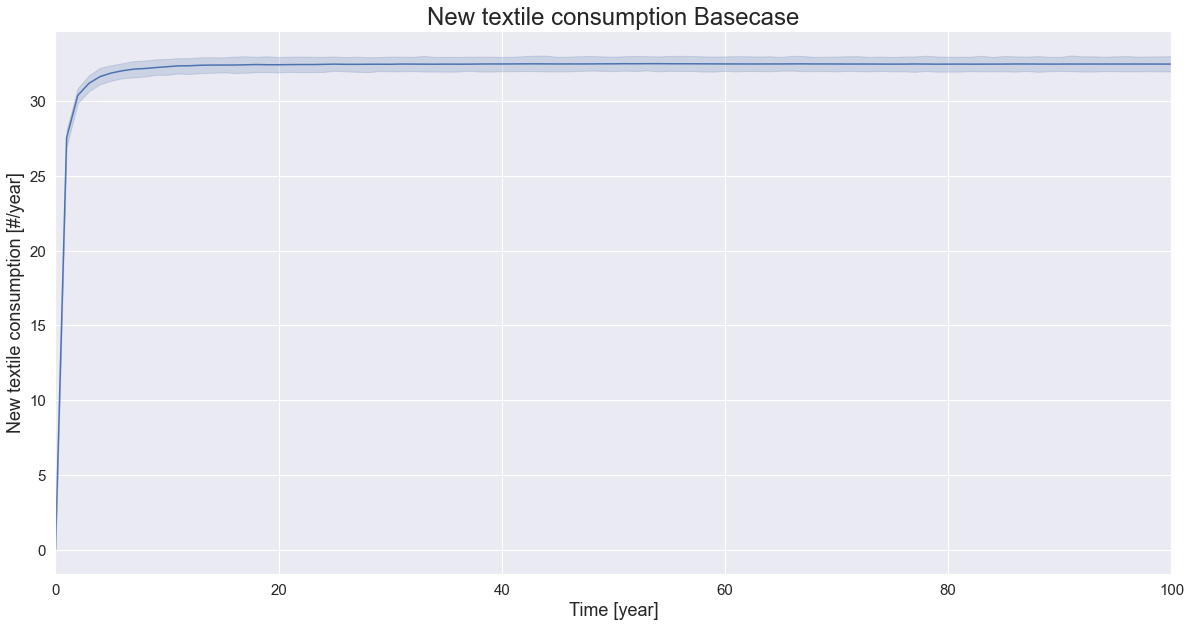

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("New textile consumption Basecase", fontsize = 24)

Text(0.5, 1.0, 'New textile consumption Basecase warm-up time')

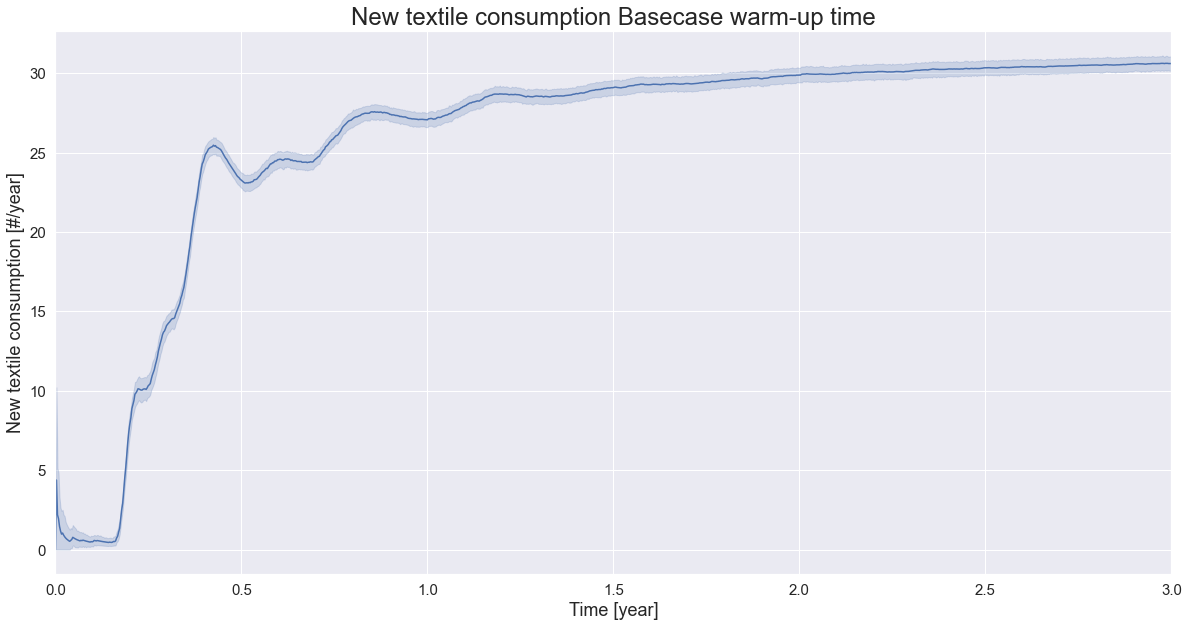

In [37]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasetest, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 3)
plt.title("New textile consumption Basecase warm-up time", fontsize = 24)

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'new-consumption', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("New textile consumption [#/year]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("New textile consumption Basecase", fontsize = 24)

Text(0.5, 1.0, 'Textile service lifespan Basecase')

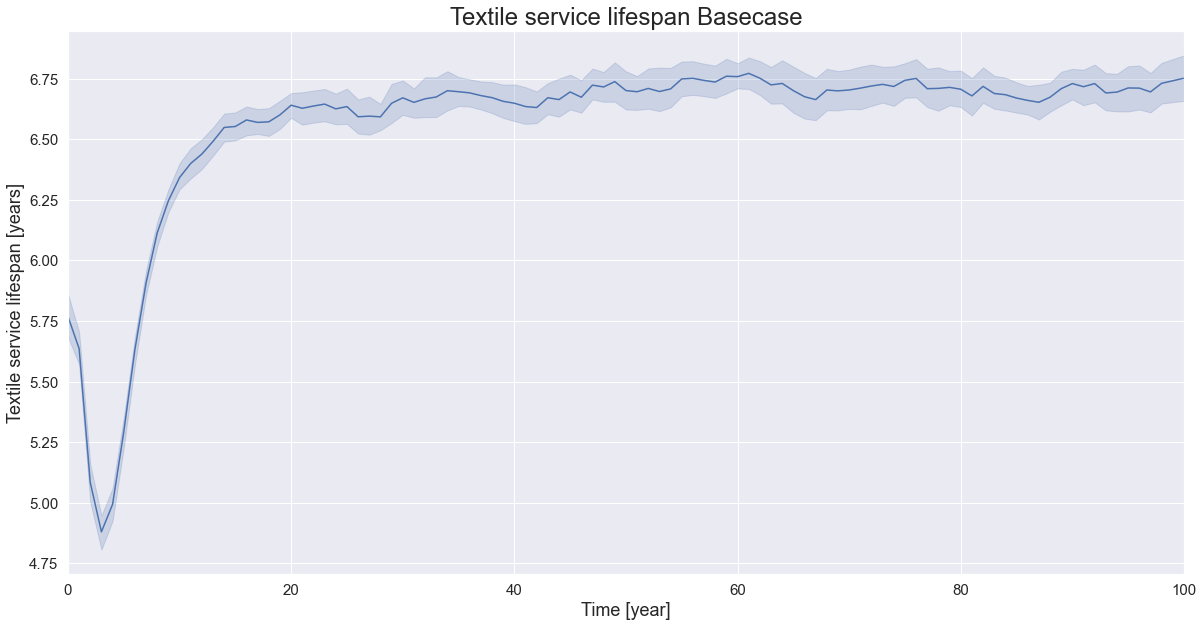

In [15]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'service-lifespan-1', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Textile service lifespan [years]", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0, 100)
plt.title("Textile service lifespan Basecase", fontsize = 24)

Text(0.5, 1.0, 'Average number of owners Basecase')

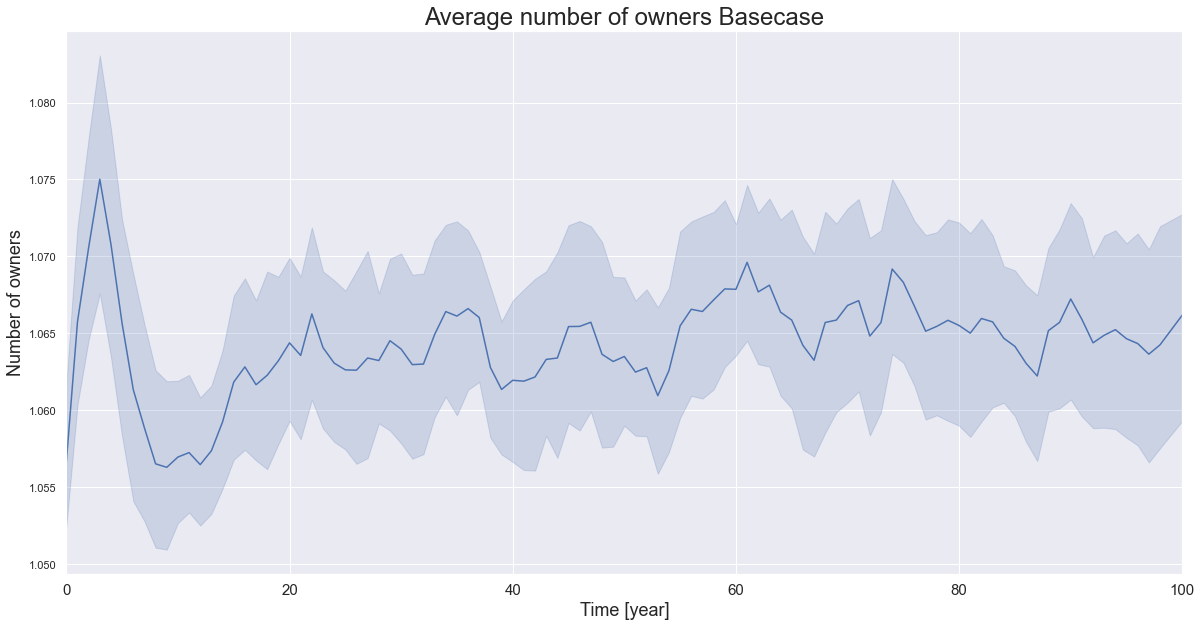

In [16]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'owners', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of owners", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(1.06,1.12)
plt.title("Average number of owners Basecase", fontsize = 24)

Text(0.5, 1.0, 'Number of textile wears Basecase')

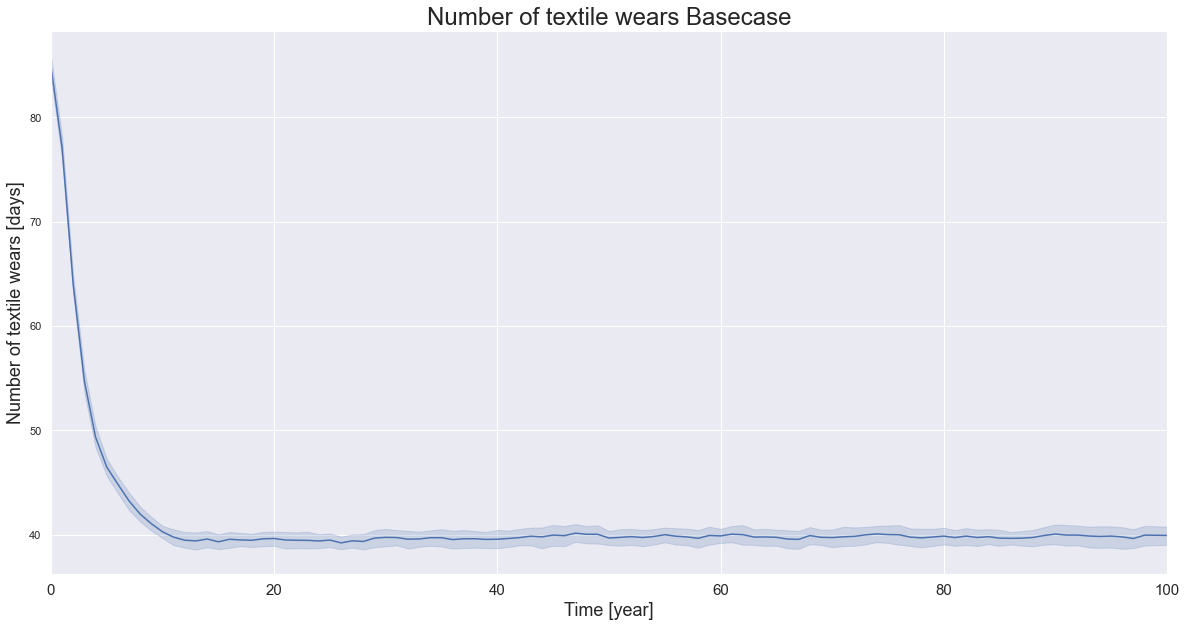

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=Basecasenormal_short, x='year', y = 'wears-1', legend='full', ci=95)
plt.xlabel("Time [year]", fontsize=18)
plt.ylabel("Number of textile wears [days]", fontsize=18)
plt.xticks(fontsize=15)
plt.xlim(0, 100)
#plt.ylim(1.06,1.12)
plt.title("Number of textile wears Basecase", fontsize = 24)

# Figures not shortend

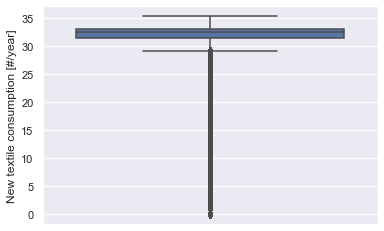

In [15]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecasenormal['new-consumption'])
ax.set_ylabel("New textile consumption [#/year]")
plt.show()

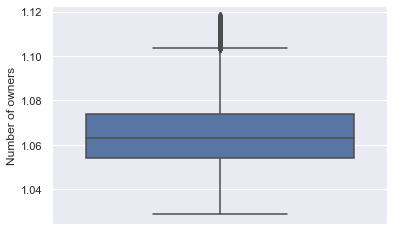

In [16]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecasenormal['owners'])
ax.set_ylabel("Number of owners")
plt.show()

In [17]:
sns.set_theme(style="darkgrid")
plt.figure(figsize(20, 10))
ax = sns.boxplot(y=Basecasenormal['reused-textiles-percentage'])
ax.set_ylabel("Reused textiles [%]")
plt.show()

NameError: name 'figsize' is not defined

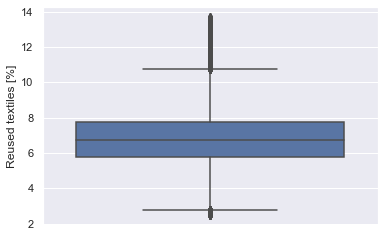

In [13]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecasenormal['reused-textiles-percentage'])
ax.set_ylabel("Reused textiles [%]")
plt.show()

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecase['wears-1'])
ax.set_ylabel("Number of textile wears [days]")
plt.show()

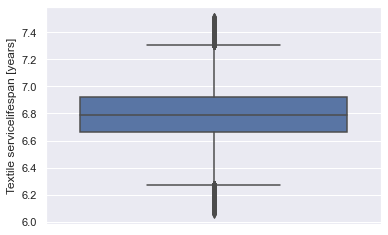

In [30]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(y=Basecase['service-lifespan-1'])
ax.set_ylabel("Textile servicelifespan [years]")
plt.show()